## Задание 1

[kaggle task](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

Есть датасет с характеристиками покупателей в магазине.
<br>
Требуется разбить покупателей на k кластеров (выбор k остается за тобой), посчитать силуэт и визуализировать полученные кластеры

Выбор k должен быть обоснован, применять можно абсолютно любые алгоритмы.



## Для начала импортируем необходимые библиотеки для работы с данными.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
df = pd.read_csv('mall_customers.csv')


##Прежде, чем начать работу, изучим данные, с которыми имеем дело.


In [3]:
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##В таблице имеется 5 столбцов(ID,пол,возраст,доход, "тратящая" способность покупателя) длиной 200 и отсутствуют пропущенные значения, что сильно облегчает нашу работу.

##Сразу уберем  из рассмотрения столбец ID покупателя, так как он ни на что не влияет и совпадает с нумерацией строк в таблице.

In [14]:
Y = df.drop(['CustomerID'], axis='columns')
Y = Y.replace('Female', 0)
Y = Y.replace('Male', 1)

##Выясним, имеются ли зависимые признаки, с помощью матрицы корреляций. Есть предположение, что пол ни на что не влияет, а зарабаток тесноо связан с "тратящей" способностью покупателя.

In [15]:
Y.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


**Предположение о том, что пол не влияет на признаки, подтвердилось, поэтому выкинем его из нашей таблицы. Как раз останется только три признака, на основе которых можно будет визуально смотреть на кластеры.**

In [16]:
Y.drop(['Gender'], axis='columns', inplace=True)

**Посмотрим на гистограммы распределения признаков.**

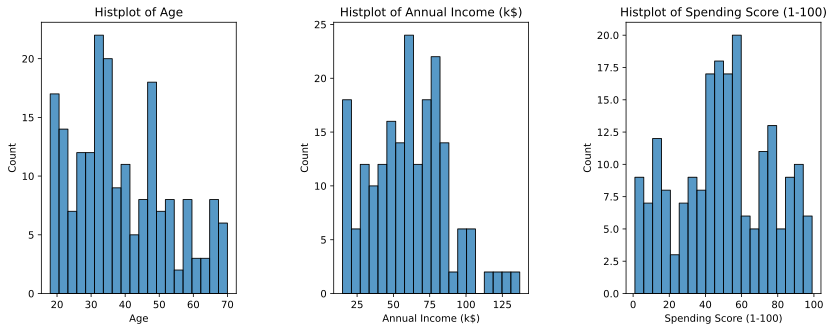

In [24]:
plt.figure(1 , figsize = (14 , 5))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Histplot of {}'.format(x))
plt.show()

In [19]:
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

**Попробуем проовести кластеризацию с помощью k-means.**

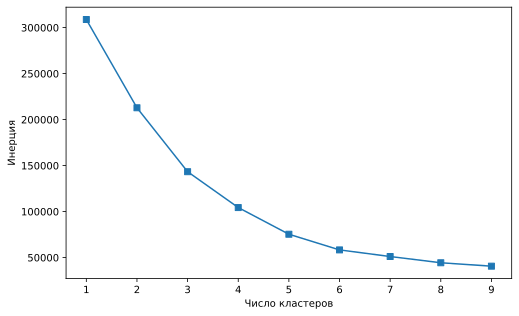

In [32]:
X=df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=1).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('Число кластеров')
plt.ylabel('Инерция');

**По правилу "локтя" остановимся на k = 5.**

In [36]:
import plotly as py
import plotly.graph_objs as go
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=1).fit(X)
labels=kmeans.predict(X)
data = go.Scatter3d(x= X['Annual Income (k$)'],y= X['Spending Score (1-100)'],
    z= X['Age'],mode='markers',
     marker=dict(color = labels, size= 9,
        line=dict(color= labels),opacity = 0.9))
layout = go.Layout(
    scene = dict(
            xaxis = dict(title  = 'Annual Income (k$)'),
            yaxis = dict(title  = 'Spending Score (1-100)'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


##Данные кластеры даже можно охаректиризовать следующим образом :
**1)Желтые  : группа молодых людей с небольшим доходом, но при этом прилично тратятся на покупки.**

**2)Оранжевые : группа людей всех возрастов с хорошей зарплатой, но при этом особо не тратятся на покупки.**

**3) Синие : группа людей всех возрастов с маленькой зарплатой и малыми тратами.**

**4) Фиолетоовые : группа людей среднего возраста(30-40) с приличным доходом и высокими тратами.**

**5) Розовые : группа людей всех возрастов с небольшой зарплатой и с умеренными тратами(40-60).**


##Можно было б применить еще DBSCAN, но он не даст хороших результатов в нашем случае.

## Задание 2 (по желанию)

Возьмем стандартный датасет ирисов, состоящий из 4-х признаков длины/ширины внутренней и наружной долей околоцветника и таргета - вид цветка (kind).

1.Требуется кластеризовать цветки (да-да, количество кластеров уже известно), посчитать **accuracy**. Выбор алгоритма опять же на усмотрение (может быть несколько)
<br>
**Важно**: метки могут расставиться в другом порядке относительно истинного таргета, то есть после кластеризации будут получены 0, а это на самом деле 1, то есть надо сделать отображение $0 \rightarrow 1$ , то же самое касается и других меток. 
<br>
Поэтому, получив метки кластеров, стоит перебрать все возможные их перестановки. 

2.Воспользоваться любым/любыми пройденными/известными алгоритмами классификации и посчитать **accuracy** 
<br>


In [48]:
from sklearn import datasets
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##Загрузим датасет ирисов и проанализируем его.

In [103]:

df = datasets.load_iris()
df = pd.DataFrame(np.hstack([df['data'], df['target'].reshape(-1,1)])
             , columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'kind'])

print('Count of unique flowers', df['kind'].unique().shape[0])
df.head()

Count of unique flowers 3


,sepal_length,sepal_width,petal_length,petal_width,kind
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   kind          150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [105]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,kind
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
kind,0.782561,-0.426658,0.949035,0.956547,1.000000


**Видим, что признаки сильно кооррелиррованы.**

In [106]:
df.kind.value_counts()

2.0    50
1.0    50
0.0    50
Name: kind, dtype: int64

**В датасете 5 столбцов(4 числовых признака и один предсказательный) длиной 150.**

**Пропущенные значения отсутствуют.**

In [107]:
X = df.iloc[:, :-1]
y = df['kind']

**Прежде, чем кластеризовать, проверим наличие кластерной структуры данных с помощью статистики Хопкинса.**

**Если статистика получается близкой к 1/2, это значит, что выборка более или менее равномерно заполняет пространство признаков. Если же статистика получается вблизи 1, это означает, что точки имеют высокую вероятность к кластеризации.**



In [108]:
def hopkins_statistic(X):
    
    X=X.values 
    sample_size = int(X.shape[0]*0.05) 
  
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] 

    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
   
    w_distances = w_distances[: , 1]
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    H = u_sum/ (u_sum + w_sum)
    return H


In [73]:
print(f'Hopkins statistics: {hopkins_statistic(X)}')

Hopkins statistics: 0.877847067871112


**Видим, что статистика близка к 1, значит высоковероятно наличие кластеров.**

**Поскольку многократные вызовы функции приведут к различным значениям H, мы вызываем функцию и вычисляем статистику Хопкинса несколько раз и берем ее среднее значение.**

In [74]:

l = [hopkins_statistic(X) for i in range(10000)] #list to hold values for each call

np.mean(l)

0.8310209965810014

**Теперь со спокойной душой можно приступать к кластеризации данных.**

**Так как мы заранее уже знаем количество классов, то посмотрим, что может нам дать K-means.**

In [89]:
def validate_with_mappings(y_true, y_pred):

    
    l = []
    permutations = itertools.permutations([0, 1, 2])
    for a, b, c in permutations:
        mapping = {0 : a, 1: b, 2: c}
        mapped_preds = [mapping[pred] for pred in y_pred]
        l.append((mapping, sum(mapped_preds == y_true) / len(y_true)))
                 
    return l

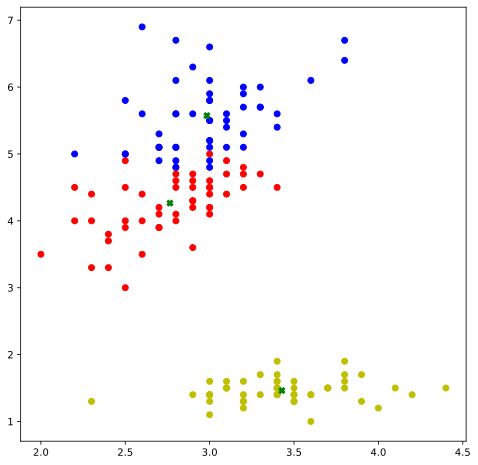

In [109]:
X1 = df.iloc[:, [1, 2, 3, 4]].values
kmeans = KMeans(n_clusters = 3, random_state=0).fit(X1)
y_kmeans = kmeans.predict(X1)

colors = ['y' if x==0 else 'r' if x==1 else 'b' if x==2 else 'black' for x in y_kmeans]

plt.figure(figsize=(8,8))
for i in range(kmeans.cluster_centers_.shape[0]):
    plt.plot(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], 'gX')
plt.scatter(X1[:,0], X1[:,1], c=colors, picker=True);

In [110]:
def validation_accuracy(y_test, y_pred):
    accuracy = []
    for i in validate_with_mappings(y_test, y_pred):
        accuracy.append(i[1])
    return(max(accuracy))

In [111]:
clusterization_acc = validation_accuracy(df['kind'], y_kmeans)
print('Accuracy score: ', clusterization_acc)

Accuracy score:  0.9933333333333333


**Видим, что обучение без учителя уже дало хороший результат.**

---



**Начнем с метода ближайших соседей. И попробуем подобрать оптимальное число соседей метоодом перебора.**

Text(0, 0.5, 'Accuracy score')

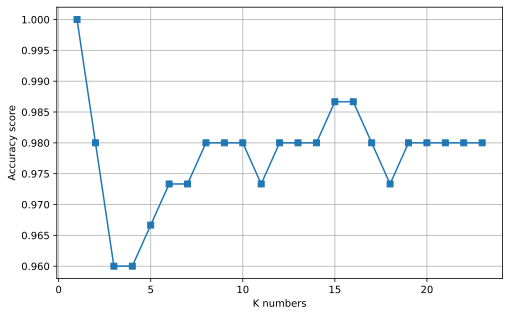

In [117]:
acc_list = []
for k in range(1, 24):
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform').fit(X,y)
    acc_list.append(accuracy_score(y,knn.predict(X)))

plt.plot(range(1, 24), acc_list, marker='s');
plt.xlabel('K numbers')
plt.grid()
plt.ylabel('Accuracy score')

In [99]:
print(f"best accuracy - {acc_list[14]}")

best accuracy - 0.9866666666666667


**Видим, что при к = 15 достигается самая высокая точность.**

Text(0, 0.5, 'Accuracy score')

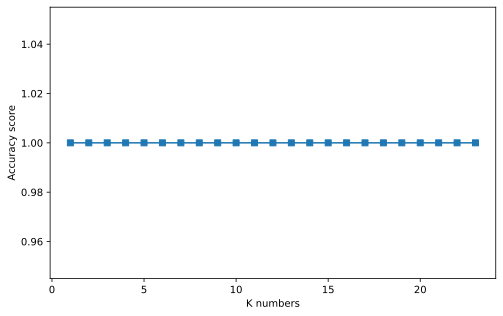

In [120]:
acc_list = []
for k in range(1, 24):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance').fit(X,y)
    acc_list.append(accuracy_score(y,knn.predict(X)))

plt.plot(range(1, 24), acc_list, marker='s');
plt.xlabel('K numbers')
plt.ylabel('Accuracy score')

**Взвешенный метод соседов уже дает 100% результат.**

**Попробуем проклассифицировать с помощью дерева решений.**

In [148]:
from six import StringIO 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [143]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

**Обучаем модель.**

In [149]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)


**Делаем предсказание.**

In [150]:
pred = clf.predict(X_test)

**Смотрим на точность предсказаний.**

In [151]:
score = clf.score(X_test, pred)
score

1.0

**Нарисуем дерево решений.**

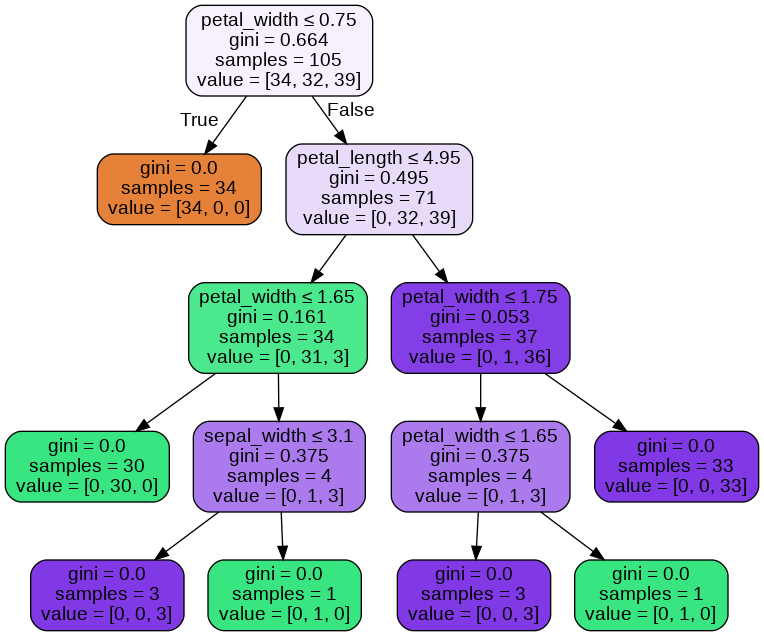

In [152]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=df.columns[:-1], filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Так как у нас уже имеется тестовая и тренировочная выборка, то проверим вышеупомянутые методы еще раз, обучая на тренировочных и проверяю на тестовых.**

Text(0, 0.5, 'Accuracy score')

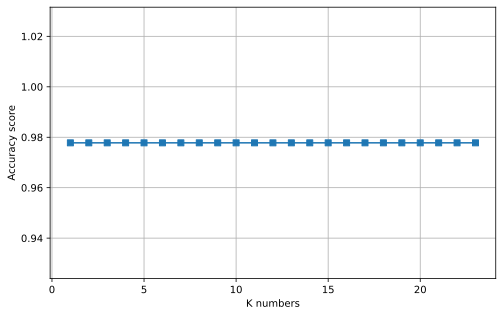

In [153]:
acc_list = []
for k in range(1, 24):
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform').fit(X_train,y_train)
    acc_list.append(accuracy_score(y_test,knn.predict(X_test)))

plt.plot(range(1, 24), acc_list, marker='s');
plt.xlabel('K numbers')
plt.grid()
plt.ylabel('Accuracy score')

Text(0, 0.5, 'Accuracy score')

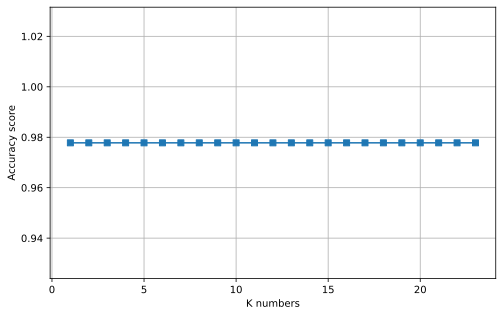

In [155]:
acc_list = []
for k in range(1, 24):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance').fit(X_train,y_train)
    acc_list.append(accuracy_score(y_test,knn.predict(X_test)))

plt.plot(range(1, 24), acc_list, marker='s');
plt.xlabel('K numbers')
plt.grid()
plt.ylabel('Accuracy score')

In [156]:
print(f"best accuracy - {acc_list[14]}")

best accuracy - 0.9777777777777777


**В обоих случаях получился одинаковый результат - 0.978**

**Теперь попробуем другой метод классификации - логистическую регрессию.**

In [160]:
LgReg= LogisticRegression()
LgReg.fit(X,y)
y_pred=LgReg.predict(X)
print(f"Accuracy for LogReg - {accuracy_score(y,y_pred)}")
print(1-accuracy_score(y,y_pred))

Accuracy for LogReg - 0.9733333333333334
0.026666666666666616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Проделаем то же самое, но с разделением выборок.**

In [162]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f"Accuracy for LogReg - {accuracy_score(y_test, y_pred)}")
print(1-accuracy_score(y_test,y_pred))

Accuracy for LogReg - 0.9777777777777777
0.022222222222222254


**Вопрос**: что оказалось лучше: алгоритм классификации(лог. регрессия) или кластеризации и на сколько?
<br>
**Ответ**: кластеризация с помощью kNN оказалась эффективнее классификации на 0.022.